#Environment (Run)

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil --q
!pip install psutil --q
!pip install humanize --q
!pip install transformers
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()

# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 15.5 MB/s 
     |████████████████████████████████| 596 kB 71.5 MB/s 
     |████████████████████████████████| 101 kB 13.0 MB/s 
     |████████████████████████████████| 6.6 MB 57.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Gen RAM Free: 12.2 GB  | Proc size: 140.7 MB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [ ]:
#import library
import numpy as np
import pandas as pd

In [ ]:
#import torch and check cuda
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


#Dataset

In [ ]:
# Upload data from Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
traindata = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Preprocessing/random oversampling result/Preprocessing Upsampling Result for Oversampling random over majority class Reply Emotion non neutral Januari 2022.xlsx')
traindata.shape

(12468, 15)

In [ ]:
# traindata_emotion = traindata[['tweet', 'Emotion Tweet']]
# traindata_emotion = traindata_emotion.loc[traindata_emotion['tweet'].notnull()]
# #traindata_emotion = traindata_emotion.drop_duplicates(subset=['tweet'], keep='first')
# mapping = {'Anger':'0', 'Disgust':'1', 'Fear':'2', 'Joy':'3', 'Sadness':'4', 'Surprise':'5'}
# for k, v in mapping.items():
#     traindata_emotion['Emotion Tweet'] = traindata_emotion['Emotion Tweet'].replace(k, v)

traindata_emotion = traindata[['text_reply', 'Emotion Reply']]
traindata_emotion = traindata_emotion.loc[traindata_emotion['text_reply'].notnull()]
#traindata_emotion = traindata_emotion.drop_duplicates(subset=['tweet'], keep='first')
mapping = {'Anger':'0', 'Disgust':'1', 'Fear':'2', 'Joy':'3', 'Sadness':'4', 'Surprise':'5'}
for k, v in mapping.items():
    traindata_emotion['Emotion Reply'] = traindata_emotion['Emotion Reply'].replace(k, v)

In [ ]:
print(traindata_emotion.shape)
print(traindata_emotion.isnull().sum())
# print(traindata_emotion['Emotion Tweet'].value_counts())
print(traindata_emotion['Emotion Reply'].value_counts())

(12402, 2)
text_reply       0
Emotion Reply    0
dtype: int64
5    2078
1    2071
3    2069
2    2064
4    2062
0    2058
Name: Emotion Reply, dtype: int64


In [ ]:
testdata = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Hasil Predict Februari 2022/IndoNLU/Predict Result Emotion Biner Reply Oversampling major class Februari 2022.xlsx")

In [ ]:
testdata

,username,id_tweet_ori,date,time,replies_count,likes_count,retweet_count,tweet,text_reply,EMOTION BINER ORI REPLY NEUTRAL,EMOTION BINER ORI REPLY EMOTION
0,afrkml,1.489401e+18,2022-02-04,00:52:05+00:00,10.0,265.0,71.0,titip salam ke guru kamu bahwa covid19 itu pen...,karena dalam islam diajarkan ketika kamu perca...,1.0,0.0
1,afrkml,1.489401e+18,2022-02-04,00:52:05+00:00,10.0,265.0,71.0,titip salam ke guru kamu bahwa covid19 itu pen...,saya kebetulan juga guru agama ners eh tapi sa...,0.0,1.0
2,afrkml,1.489401e+18,2022-02-04,00:52:05+00:00,10.0,265.0,71.0,titip salam ke guru kamu bahwa covid19 itu pen...,ada juga yang aneh masih keluarga ku capek ban...,1.0,0.0
3,afrkml,1.489401e+18,2022-02-04,00:52:05+00:00,10.0,265.0,71.0,titip salam ke guru kamu bahwa covid19 itu pen...,orang kayak begini meski sudah kena juga akan ...,1.0,0.0
4,afrkml,1.489401e+18,2022-02-04,00:52:05+00:00,10.0,265.0,71.0,titip salam ke guru kamu bahwa covid19 itu pen...,berbisnis yang tidak mementingkan kesehatan da...,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7778,mbahndi,1.494559e+18,2022-02-18,06:27:00+00:00,2.0,64.0,22.0,banyak pasien muda antara usia 2025 tahun yang...,kalau saya biasanya karena takut terhadap sesu...,1.0,0.0
7779,mbahndi,1.494559e+18,2022-02-18,06:27:00+00:00,2.0,64.0,22.0,banyak pasien muda antara usia 2025 tahun yang...,mungkin yang tidak tahu penyebabnya makin kura...,1.0,0.0
7780,mbahndi,1.494522e+18,2022-02-18,04:01:21+00:00,2.0,7.0,0.0,dua belas tahun yang lalu saya menulis notes i...,namanya juga usaha berdoa cengiran,1.0,0.0
7781,mbahndi,1.494522e+18,2022-02-18,04:01:21+00:00,2.0,7.0,0.0,dua belas tahun yang lalu saya menulis notes i...,masih awal tahun 2010 saya masih 3 sama belum ...,1.0,0.0


In [ ]:
# testdata = testdata[testdata['EMOTION BINER ORI TWEET NEUTRAL']!=1]
testdata = testdata[testdata['EMOTION BINER ORI REPLY NEUTRAL']!=1]

In [ ]:
# testdata = testdata.loc[testdata['tweet'].notnull()]
testdata = testdata.loc[testdata['text_reply'].notnull()]
print(testdata.isnull().sum())

username                           0
id_tweet_ori                       0
date                               0
time                               0
replies_count                      0
likes_count                        0
retweet_count                      0
tweet                              0
text_reply                         0
EMOTION BINER ORI REPLY NEUTRAL    0
EMOTION BINER ORI REPLY EMOTION    0
dtype: int64


In [ ]:
# print(traindata_sentiment.shape,testdata.shape)
# print(traindata_sentiment.isnull().sum())
# print(testdata_sentiment.isnull().sum())

#BERT Tokenizer

In [ ]:
from transformers import BertTokenizer

print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1", do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
# sentences = traindata_emotion['tweet'].values

# labels = traindata_emotion['Emotion Tweet'].astype(int).values

sentences = traindata_emotion['text_reply'].values

labels = traindata_emotion['Emotion Reply'].astype(int).values

In [ ]:
len(sentences)

12402

In [ ]:
# test_sentences = testdata['tweet'].values
test_sentences = testdata['text_reply'].values

In [ ]:
import statistics
sent_length = []

# Untuk setiap kalimat
for sent in sentences:
    # Tokenisasi teks dan tambah token `[CLS]` dan `[SEP]`
    token_ids = tokenizer.encode(sent, add_special_tokens=True)
    sent_length.append(len(token_ids))

print('Average length = ', sum(sent_length)/len(sent_length))
print('Median length = ', statistics.median(sent_length))

Average length =  19.53870343492985
Median length =  15.0


In [ ]:
# Tokenisasi semua kalimat dan map token ke bentuk word id
token_ids = []
attention_masks = []


for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Kalimat yang diencode
                        add_special_tokens = True, # Penambahan '[CLS]' dan '[SEP]'
                        max_length = 100,           # Pad dan truncate semua kalimat jadi 100
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Buat attetion mask (pembeda kalimat dan padding)
                        return_tensors = 'pt',     # Return pytorch tensors
                   )
    
    token_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

# Ubah list token ids dan attention mask menjadi tensor
input_ids = torch.cat(token_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)
# labels = torch.nn.functional.one_hot(labels.to(torch.int64))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Print kalimat dengan index 0
print('Original: ', sentences[0])
print('Token IDs:', token_ids[0])
print('Attention Masks:', attention_masks[0])

Original:  hari ini hadiri trah pertemuan keluarga besar simbah setelah hampir 2 tahu tidak diselenggarakan kerna wabah
Token IDs: tensor([    2,   406,    92, 24944, 10024, 30369,  3176,  1137,   421,  4691,
           21,   450,  1856,   109,   899,   119,  5831,   238,   491, 18465,
            3,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
Attention Masks: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

#Training and Validation Data Preparation (Don't Run it)

In [ ]:
from torch.utils.data import TensorDataset, random_split

# Gabungkan setiap token (input training) menjadi TensorDataset
dataset = TensorDataset(input_ids, attention_masks, labels)

# Bagi data 80-20 train-validation split.
# Hitung jumlah sampel pada masing-masing split size
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

# Bagi secara random data untuk train dan val tanpa ada yang tumpang tindih
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

9,921 training samples
2,481 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Set batch_size 32 https://link.springer.com/article/10.1007/s10660-022-09560-w
''' BERT authors recommend the hyperparameters used for fine-tuning [22]. 
For training and validation of classifiers developed with sequence lengths of 64, 128, 256, and 320,
 a batch size of 32 is used. For fine-tuning BERT, the authors recommend batch sizes of 16 and 32 '''
batch_size = 32

# Buat DataLoader untuk train dan val set untuk mengatur batching dan sampling
# Training sample diambil urutannya secara acak (agar dalam satu batch diharapkan sample bervariasi)
train_dataloader = DataLoader(
            train_dataset,  # The training samples
            sampler = RandomSampler(train_dataset), # Pilih sample batch secara random
            batch_size = batch_size # Train dengan jumlah batch size 32
        )

# Validation sample diambil secara berurutan (karena urutan sudah tidak penting lagi)
validation_dataloader = DataLoader(
            val_dataset, # The validation samples
            sampler = SequentialSampler(val_dataset), # Pilih sample batch secara sequential (urut)
            batch_size = batch_size # Evaluasi dengan jumlah batch size 32
        )

#Training

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import BertModel
# Load BertForSequenceClassification: the pretrained BERT model with single linear classification layer on top 
model = BertForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1", 
    num_labels = 6, #jumlah label
    output_attentions = False, # tidak return attentions weights
    output_hidden_states = False, # tidak returns all hidden-states
)

# Run model di GPU
model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

learning rate dan epsilon mengikuti eksperimen penelitian lalu
https://docs.google.com/document/d/1BFZQx3uELgcoDQVa8sMNKhbAaMXtx3Vjb2DZ6Uayci4/edit

In [ ]:
from transformers import AdamW

#AdamW optimizer dengan weight decay untuk menurunkan kemungkinan overfitting
optimizer = torch.optim.AdamW(model.parameters(),
                  lr = 2e-5, 
                  eps = 1e-8
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 10

# Total jumlah training steps = [Jumlah batch] x [Jumlah epochs]
print('Jumlah batch :', len(train_dataloader))
total_steps = len(train_dataloader) * epochs

# Warmup explanation https://stackoverflow.com/questions/60120043/optimizer-and-scheduler-for-bert-fine-tuning,
# https://huggingface.co/docs/transformers/main_classes/optimizer_schedules#transformers.get_linear_schedule_with_warmup
# num_warmup_steps default 0
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

Jumlah batch : 311


## Training Loop

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import numpy as np

# Hitung akurasi prediksi vs label
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import random

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

loss_values = []
y_true_val=[]
y_pred_val = []

for epoch_i in range(0, epochs):

  # ===================================
  #              Training
  # ===================================

  print("======= Epoch {:} / {:} =======".format(epoch_i+1, epochs))
  print("Training...")

  t0 = time.time()

  total_loss = 0
  train_accuracy = 0
  model.train()

  # Untuk setiap batch
  for step, batch in enumerate(train_dataloader):
    
    # Progress update setiap 10 batches
    if step % 10 == 0 and not step == 0:
      elapsed = format_time(time.time() - t0)

      print("Batch {:>5,} of {:>5,}.     Elapsed: {:}".format(step, len(train_dataloader), elapsed))
    
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    model.zero_grad()

    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)
    
    loss = outputs[0]
    pred = outputs[1]
    pred = pred.detach().cpu().numpy()
    total_loss += loss.item()

    loss.backward()
    label_ids = b_labels.to('cpu').numpy()

    tmp_train_accuracy = flat_accuracy(pred, label_ids)

    train_accuracy += tmp_train_accuracy

    step += 1
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    optimizer.step()

    scheduler.step()

  avg_train_loss = total_loss / len(train_dataloader)

  loss_values.append(avg_train_loss)

  print("   Accuracy: {0:.2f}".format(train_accuracy/step))
  print("   Average training loss: {0:.2f}".format(avg_train_loss))
  print("   Training epoch took: {:}".format(format_time(time.time() - t0)))

  # ===================================
  #             Validation
  # ===================================

  print("Running Validation...")

  t0 = time.time()

  model.eval()

  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  for batch in validation_dataloader:

    batch = tuple(t.to(device) for t in batch)

    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
      outputs = model(b_input_ids,
                      token_type_ids=None,
                      attention_mask=b_input_mask)
    
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)

    eval_accuracy += tmp_eval_accuracy

    nb_eval_steps += 1
    if epoch_i==9:
      y_pred_val.append(logits)
      y_true_val.append(label_ids)
  
  print("   Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
  print("   Validation took: {:}".format(format_time(time.time() - t0)))

print("Training complete!")

======= Epoch 1 / 10 =======
Training...
Batch    10 of   311.     Elapsed: 0:00:03
Batch    20 of   311.     Elapsed: 0:00:06
Batch    30 of   311.     Elapsed: 0:00:09
Batch    40 of   311.     Elapsed: 0:00:12
Batch    50 of   311.     Elapsed: 0:00:16
Batch    60 of   311.     Elapsed: 0:00:19
Batch    70 of   311.     Elapsed: 0:00:22
Batch    80 of   311.     Elapsed: 0:00:25
Batch    90 of   311.     Elapsed: 0:00:28
Batch   100 of   311.     Elapsed: 0:00:31
Batch   110 of   311.     Elapsed: 0:00:34
Batch   120 of   311.     Elapsed: 0:00:37
Batch   130 of   311.     Elapsed: 0:00:40
Batch   140 of   311.     Elapsed: 0:00:43
Batch   150 of   311.     Elapsed: 0:00:46
Batch   160 of   311.     Elapsed: 0:00:50
Batch   170 of   311.     Elapsed: 0:00:53
Batch   180 of   311.     Elapsed: 0:00:56
Batch   190 of   311.     Elapsed: 0:00:59
Batch   200 of   311.     Elapsed: 0:01:02
Batch   210 of   311.     Elapsed: 0:01:05
Batch   220 of   311.     Elapsed: 0:01:08
Batch   230 o

## Performance Evaluation (Don't Run It)

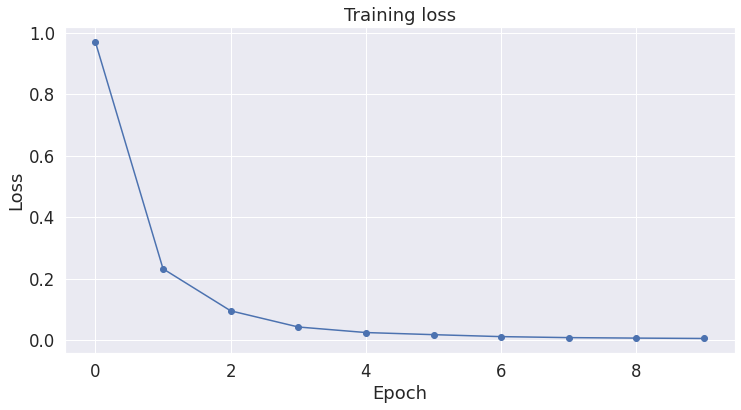

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(loss_values, 'b-o')

plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [ ]:
import sklearn.metrics as skm
import numpy as np

y_pred_val = np.concatenate(y_pred_val, axis=0)
y_pred_val = np.argmax(y_pred_val, axis=1).flatten()


y_true_val = np.concatenate(y_true_val, axis=0)
# y_true_val = np.argmax(y_true_val, axis=1).flatten()


print(len(y_pred_val))
print(len(y_true_val))

2481
2481


In [ ]:
cm = skm.multilabel_confusion_matrix(y_true_val, y_pred_val)
print(cm)
print(skm.classification_report(y_true_val, y_pred_val))

[[[2074    7]
  [   0  400]]

 [[2014   28]
  [  23  416]]

 [[2035    4]
  [   0  442]]

 [[2065   21]
  [  61  334]]

 [[2064   24]
  [   9  384]]

 [[2060    9]
  [   0  412]]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       400
           1       0.94      0.95      0.94       439
           2       0.99      1.00      1.00       442
           3       0.94      0.85      0.89       395
           4       0.94      0.98      0.96       393
           5       0.98      1.00      0.99       412

    accuracy                           0.96      2481
   macro avg       0.96      0.96      0.96      2481
weighted avg       0.96      0.96      0.96      2481



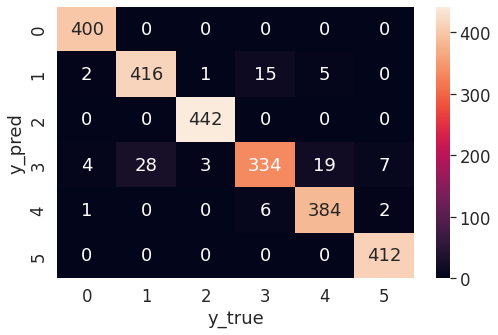

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true_val, y_pred_val), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.show()

# Predict

In [ ]:
token_ids = []
attention_masks = []


for sent in test_sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,                 
                        add_special_tokens = True,
                        max_length = 256,          
                        pad_to_max_length = True,
                        return_attention_mask = True, 
                        return_tensors = 'pt',    
                        padding = 'max_length',
                   )
    
    token_ids.append(encoded_dict['input_ids'])
    
    attention_masks.append(encoded_dict['attention_mask'])


input_ids = torch.cat(token_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

batch_size = 1

prediction_data = TensorDataset(token_ids, attention_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
print('Jumlah batch :', len(prediction_dataloader))

Jumlah batch : 1579


In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(token_ids)))

# Ubah model jadi mode evaluasi
model.eval()

predictions = []

for batch in prediction_dataloader:
  # Tambah batch ke GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack inputs dari dataloader
  b_input_ids, b_input_mask = batch
  
  # Untuk prediksi gradien tidak dihitung atau disimpan (autograd dimatikan) untuk saving memory dan mempercepat prediksi
  with torch.no_grad():
      # Hitung logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Pindah logits dan label ke CPU
  logits = logits.detach().cpu().numpy()
  
  # Simpan prediksi
  predictions.append(logits)

print('    DONE.')

Predicting labels for 1,579 test sentences...
    DONE.


In [ ]:
predictions

[array([[-0.70902187, -2.5736327 , -0.864254  , -0.6680762 , -0.37932986,
          4.511723  ]], dtype=float32),
 array([[-0.70902187, -2.5736327 , -0.864254  , -0.6680762 , -0.37932986,
          4.511723  ]], dtype=float32),
 array([[-0.70902187, -2.5736327 , -0.864254  , -0.6680762 , -0.37932986,
          4.511723  ]], dtype=float32),
 array([[-0.70902187, -2.5736327 , -0.864254  , -0.6680762 , -0.37932986,
          4.511723  ]], dtype=float32),
 array([[-0.70902187, -2.5736327 , -0.864254  , -0.6680762 , -0.37932986,
          4.511723  ]], dtype=float32),
 array([[-0.70902187, -2.5736327 , -0.864254  , -0.6680762 , -0.37932986,
          4.511723  ]], dtype=float32),
 array([[-0.70902187, -2.5736327 , -0.864254  , -0.6680762 , -0.37932986,
          4.511723  ]], dtype=float32),
 array([[-0.70902187, -2.5736327 , -0.864254  , -0.6680762 , -0.37932986,
          4.511723  ]], dtype=float32),
 array([[-0.70902187, -2.5736327 , -0.864254  , -0.6680762 , -0.37932986,
          4.51

In [ ]:
np.shape(predictions)

(1579, 1, 6)

In [ ]:
predictions = np.concatenate(predictions, axis=0)

In [ ]:
data_result = pd.DataFrame(predictions, columns=['EMOTION TWEET ANGER', 'EMOTION TWEET DISGUST', 'EMOTION TWEET FEAR', 'EMOTION TWEET JOY', 'EMOTION TWEET SADNESS', 'EMOTION TWEET SURPRISE'])

In [ ]:
dfhasilpredict = data_result.eq(data_result.where(data_result != 0).max(1), axis=0).astype(int)
dfhasilpredict

,EMOTION TWEET ANGER,EMOTION TWEET DISGUST,EMOTION TWEET FEAR,EMOTION TWEET JOY,EMOTION TWEET SADNESS,EMOTION TWEET SURPRISE
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
1574,0,0,0,1,0,0
1575,0,0,0,1,0,0
1576,0,0,0,0,0,1
1577,0,0,0,0,0,1


In [ ]:
print(testdata.shape)
print(dfhasilpredict.shape)

(1579, 11)
(1579, 6)


In [ ]:
finalresult = pd.concat([testdata.reset_index(), dfhasilpredict.reset_index()], axis=1, sort=False)
finalresult = finalresult.drop('index', axis=1)
finalresult

,username,id_tweet_ori,date,time,replies_count,likes_count,retweet_count,tweet,text_reply,EMOTION BINER TWEET NEUTRAL,EMOTION BINER TWEET EMOTION,EMOTION TWEET ANGER,EMOTION TWEET DISGUST,EMOTION TWEET FEAR,EMOTION TWEET JOY,EMOTION TWEET SADNESS,EMOTION TWEET SURPRISE
0,afrkml,1.489182e+18,2022-02-03,10:21:52+00:00,61,467,101,astaga 27197 kasus baru hari ini capek,oootrmksh infonya mbak berdoa semoga anak² dan...,0,1,0,0,0,0,0,1
1,afrkml,1.489182e+18,2022-02-03,10:21:52+00:00,61,467,101,astaga 27197 kasus baru hari ini capek,astaga dragon,0,1,0,0,0,0,0,1
2,afrkml,1.489182e+18,2022-02-03,10:21:52+00:00,61,467,101,astaga 27197 kasus baru hari ini capek,ners tadi lihat di tiktok ada yang dipalsuin h...,0,1,0,0,0,0,0,1
3,afrkml,1.489182e+18,2022-02-03,10:21:52+00:00,61,467,101,astaga 27197 kasus baru hari ini capek,sdm berkurang karena isolasi tapi pasien tetap...,0,1,0,0,0,0,0,1
4,afrkml,1.489182e+18,2022-02-03,10:21:52+00:00,61,467,101,astaga 27197 kasus baru hari ini capek,biseps biseps biseps,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,mbahndi,1.494624e+18,2022-02-18,10:43:17+00:00,7,5,3,langganan youtube music itu lebih baik daripad...,setuju mbahdok,0,1,0,0,0,1,0,0
1575,mbahndi,1.494624e+18,2022-02-18,10:43:17+00:00,7,5,3,langganan youtube music itu lebih baik daripad...,bisa offline juga tidak sih dokter,0,1,0,0,0,1,0,0
1576,mbahndi,1.494522e+18,2022-02-18,04:01:21+00:00,2,7,0,dua belas tahun yang lalu saya menulis notes i...,namanya juga usaha berdoa cengiran,0,1,0,0,0,0,0,1
1577,mbahndi,1.494522e+18,2022-02-18,04:01:21+00:00,2,7,0,dua belas tahun yang lalu saya menulis notes i...,masih awal tahun 2010 saya masih 3 sama belum ...,0,1,0,0,0,0,0,1


In [ ]:
from google.colab import files
finalresult.to_excel('/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/result/Predict Result IndoNLU Emotion Tweet Oversampling major class Februari 2022.xlsx', index=False) 


#Save Model

In [ ]:
filepath = '/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/indobertindobenchmarkemotionreply.pth'
torch.save(model, filepath)